# Homework 3

In [88]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution



## 1.0

All of the exercises in 1. are based on the `class.csv` dataset


In [89]:
# specifying file name
file = Path('data').joinpath('class.csv')

# setting pandas print options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# reading the file into Python
campaign = pd.read_csv(file)


# outputting the first ten rows of the dataset
campaign.head(n = 10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


## 1.1

Perform EDA on the dataset. Describe what you are seeing. Clean the data

In [90]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [91]:
campaign.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [92]:
# Check for missing values
missing_values = campaign.isnull().sum()
print(missing_values)

# Since there are no missing values, we don't need to handle them.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [93]:
# Descriptive statistics for numerical columns
print(campaign.describe())

               age      duration      campaign         pdays      previous  emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed             y
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593    962.475454      0.172963      0.081886       93.575664     -40.502600      3.621291   5167.035911      0.112654
std       10.42125    259.279249      2.770014    186.910907      0.494901      1.570960        0.578840       4.628198      1.734447     72.251528      0.316173
min       17.00000      0.000000      1.000000      0.000000      0.000000     -3.400000       92.201000     -50.800000      0.634000   4963.600000      0.000000
25%       32.00000    102.000000      1.000000    999.000000      0.000000     -1.800000       93.075000     -42.700000      1.344000   5099.100000      0.000000
50%       38.00000    180.00

In [94]:
# Explore categorical columns
for column in campaign.select_dtypes(include='object').columns:
    print(column)
    print(campaign[column].value_counts())
    print()

job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

contact
contact
cel

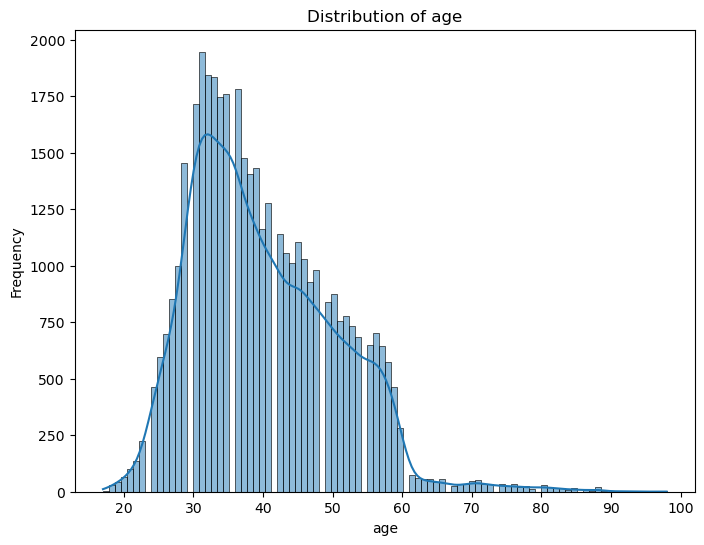

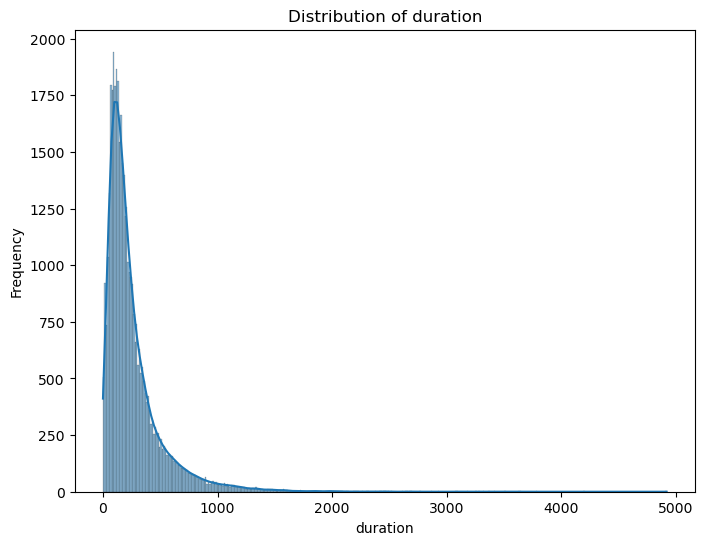

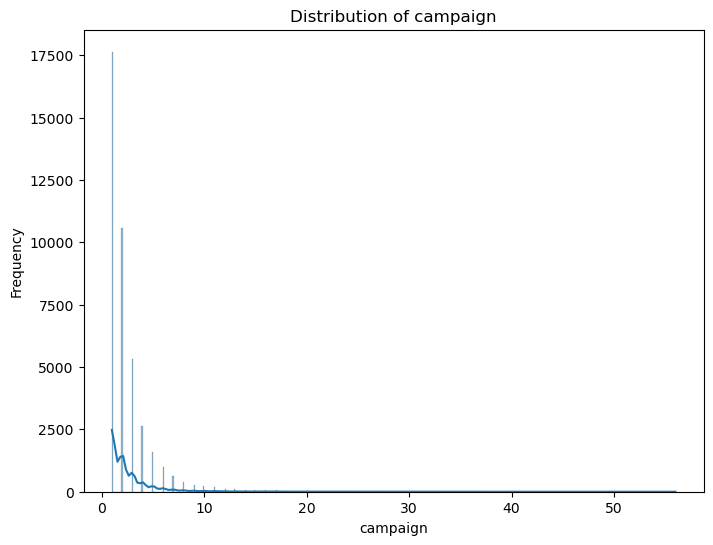

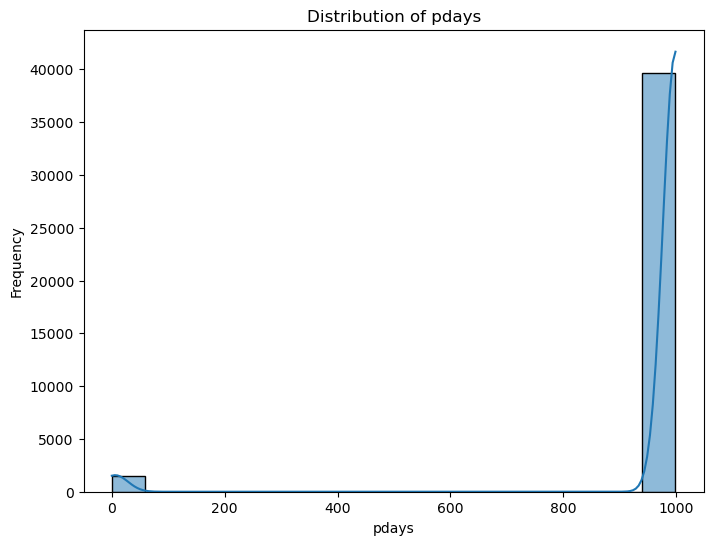

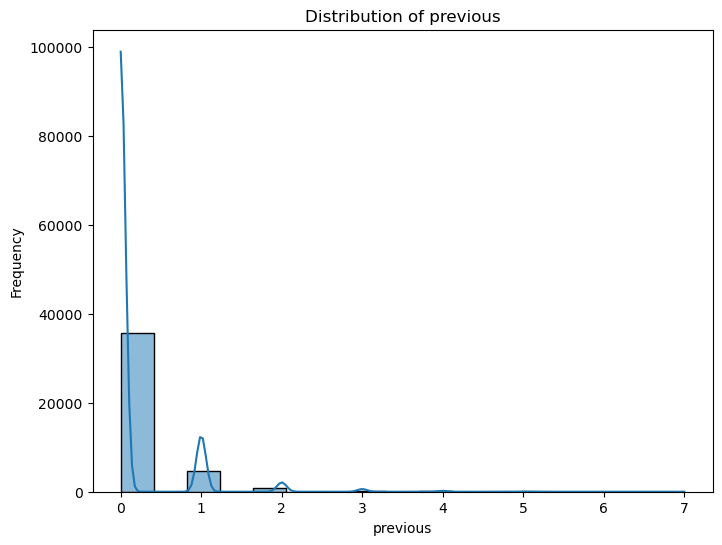

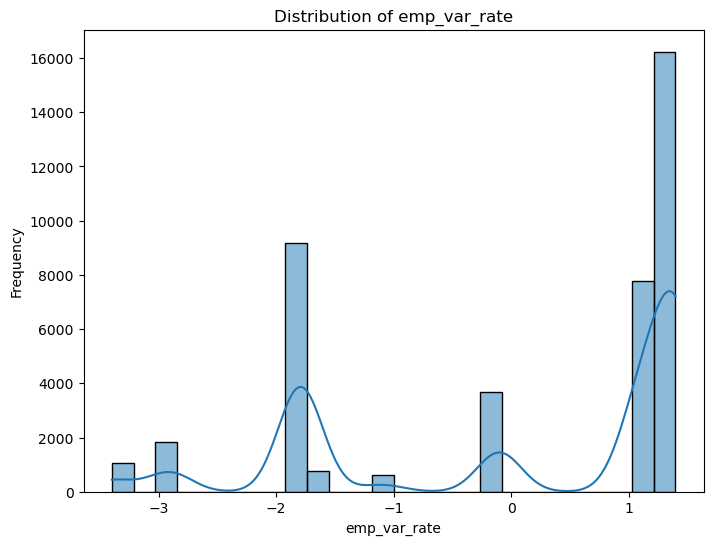

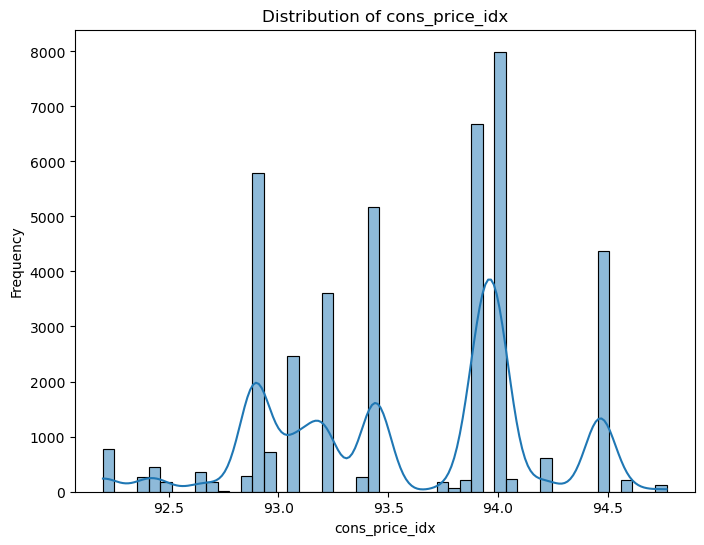

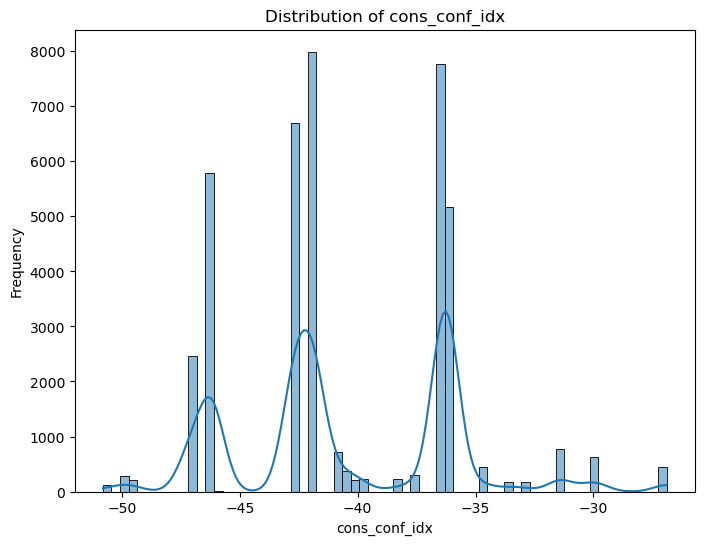

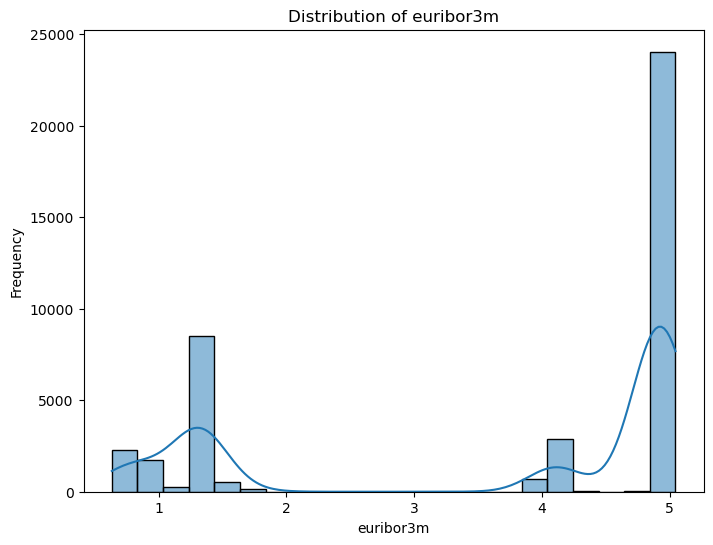

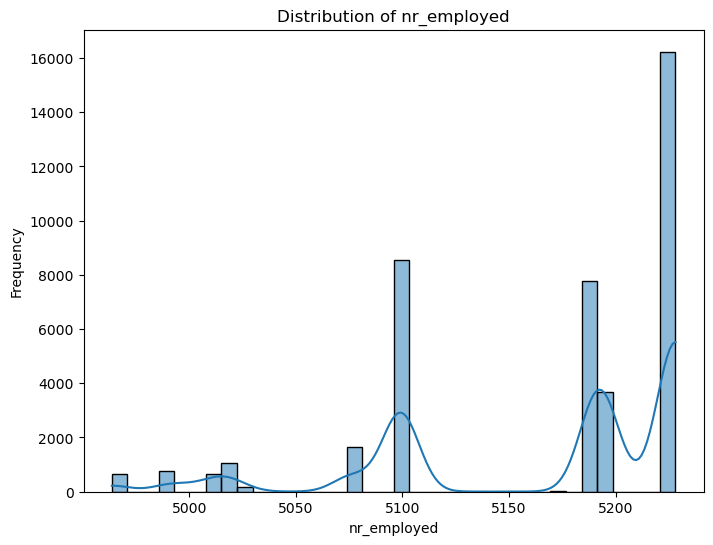

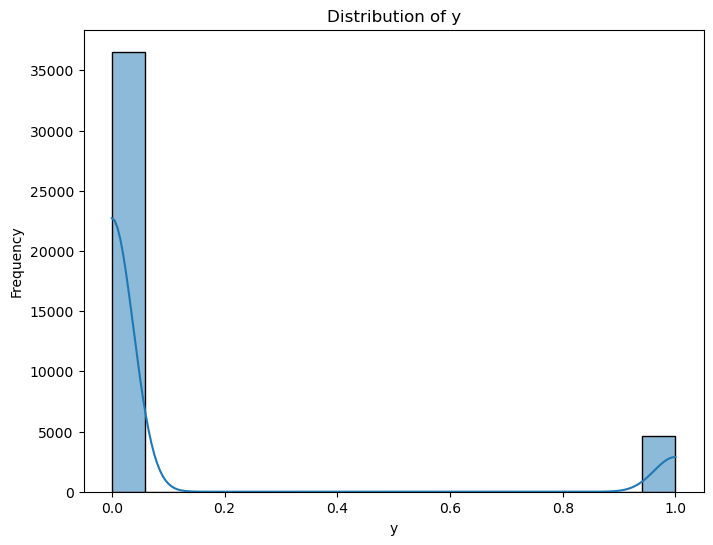

In [95]:
# Visualize the distribution of numerical columns
numerical_columns = campaign.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(campaign[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

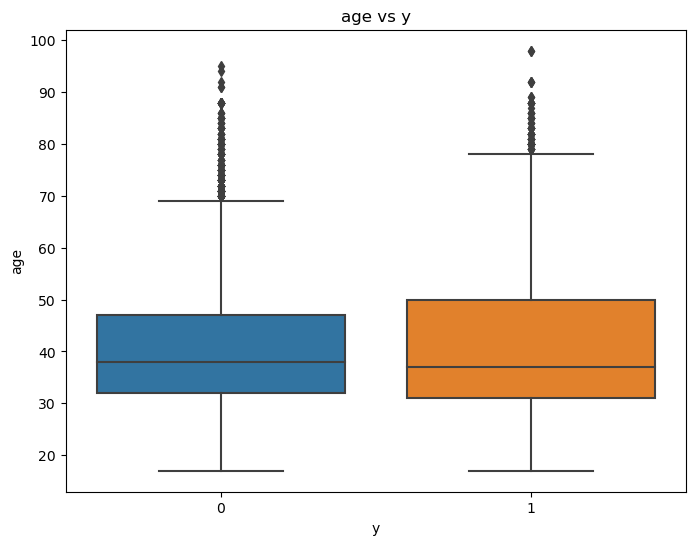

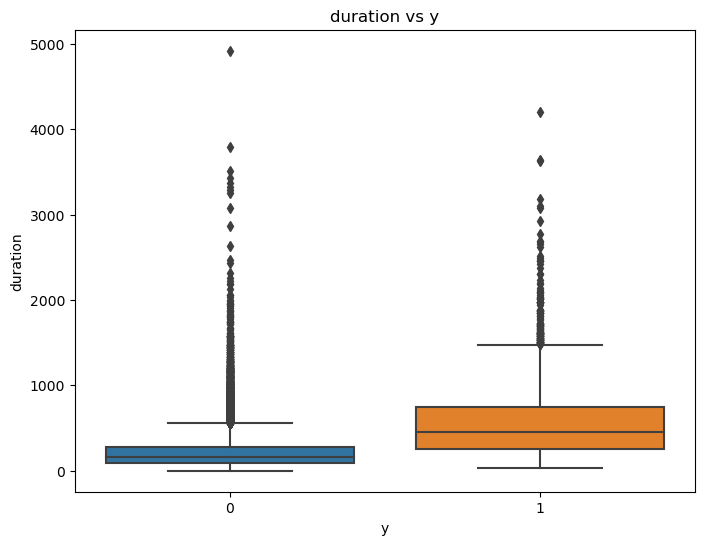

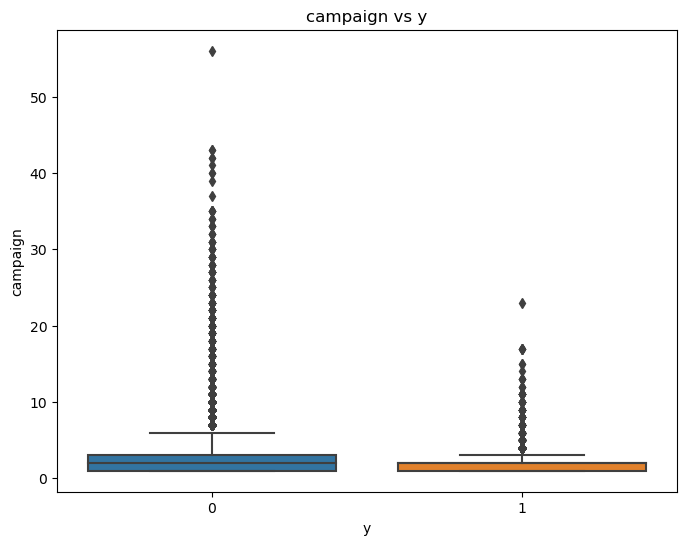

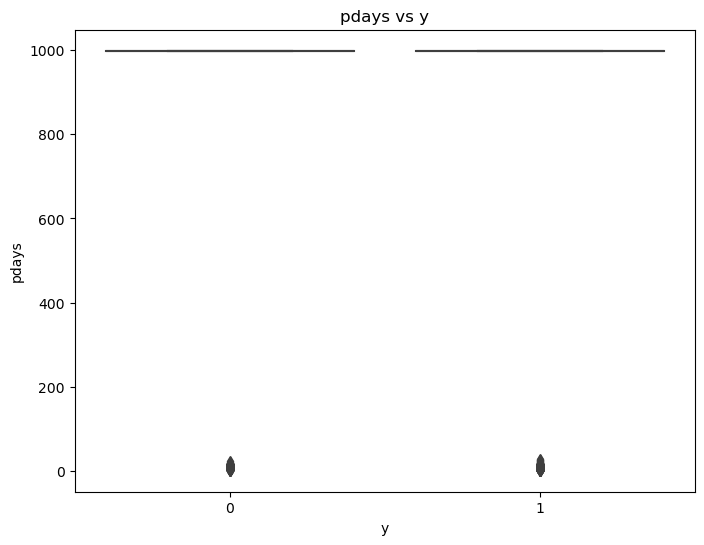

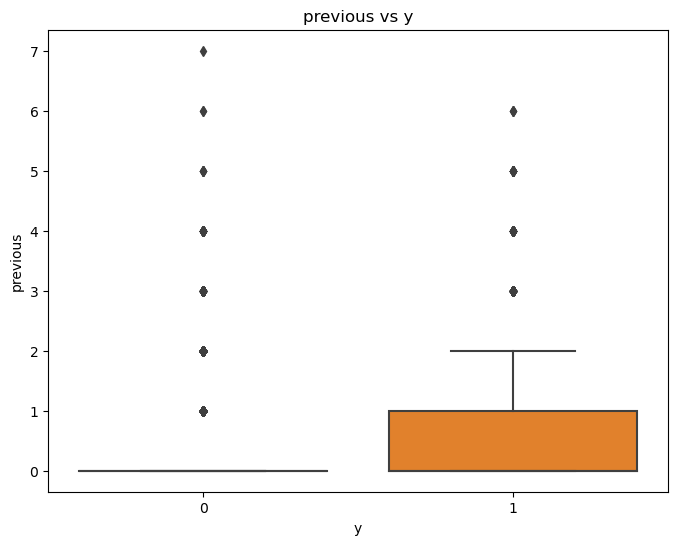

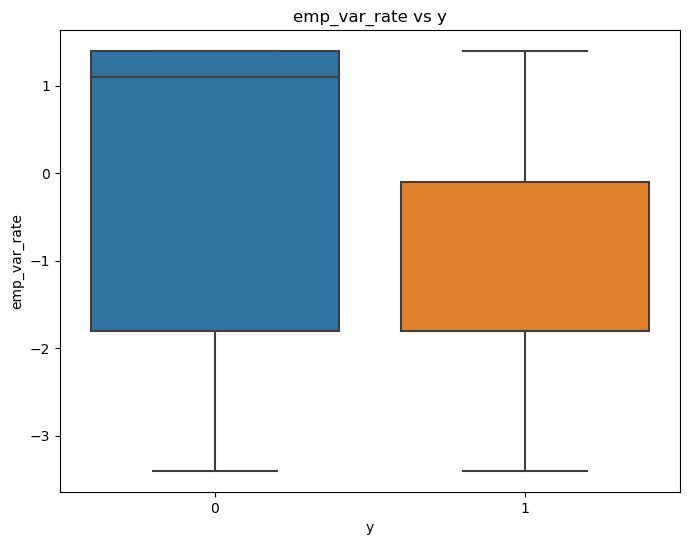

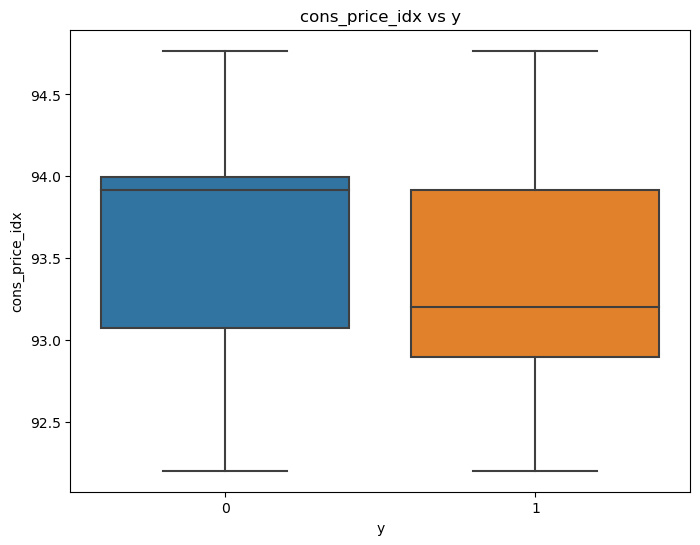

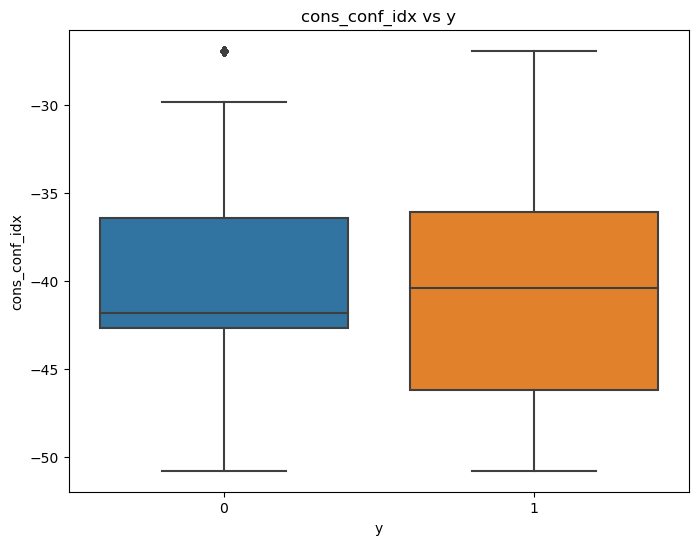

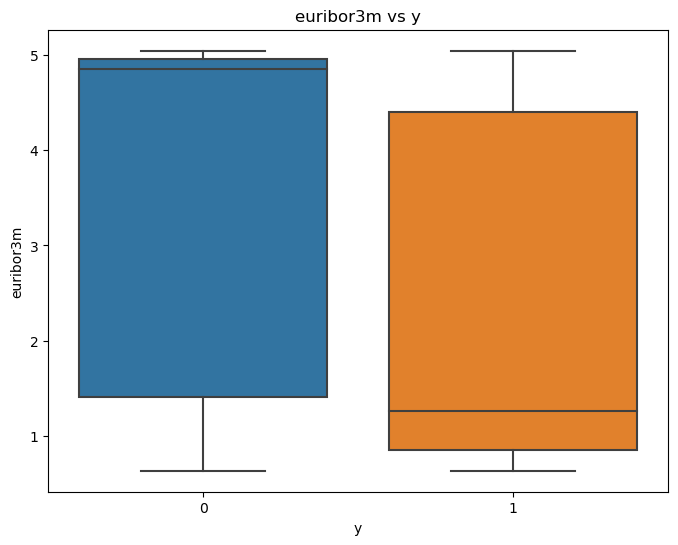

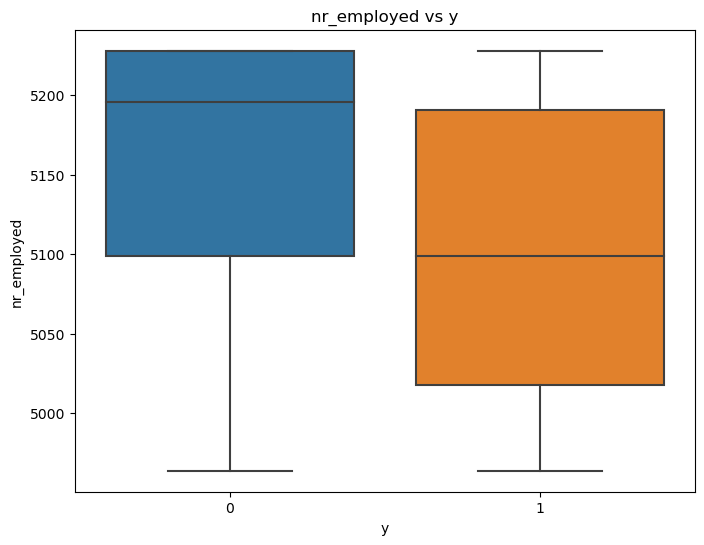

In [96]:
# Visualize the relationship between numerical columns and the target variable 'y'
for column in numerical_columns:
    if column != 'y':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='y', y=column, data=campaign)
        plt.title(f'{column} vs y')
        plt.xlabel('y')
        plt.ylabel(column)
        plt.show()

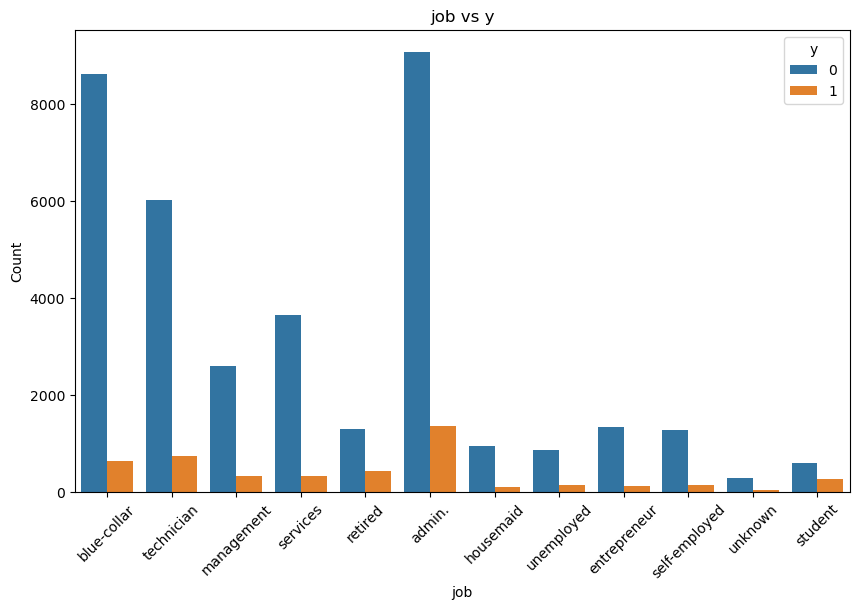

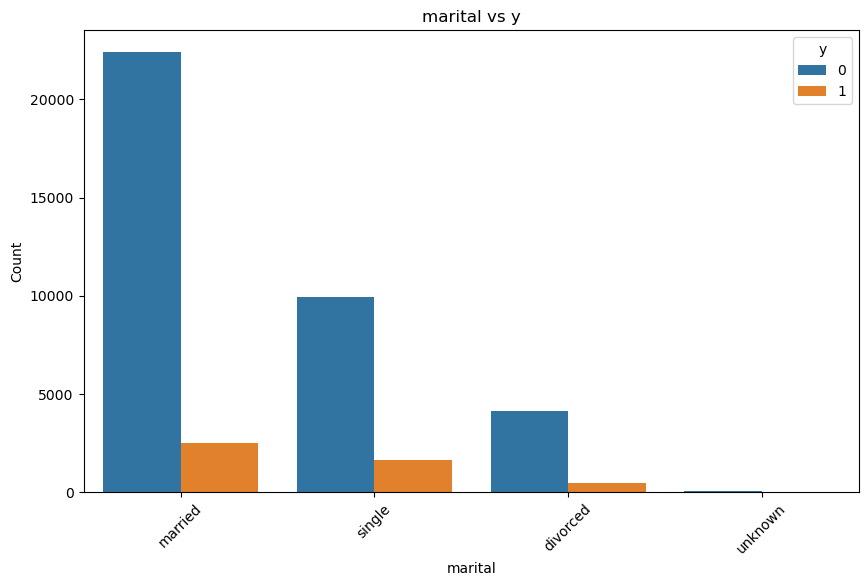

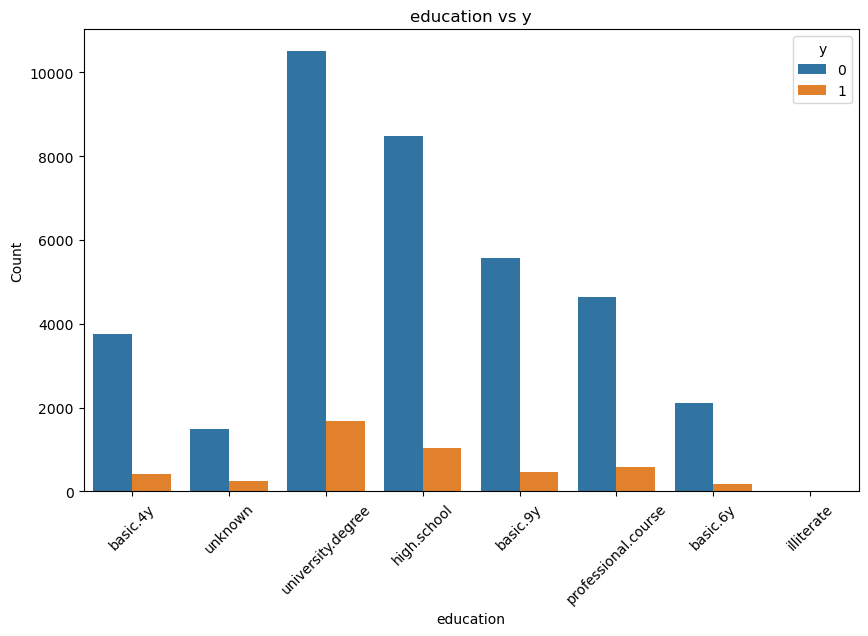

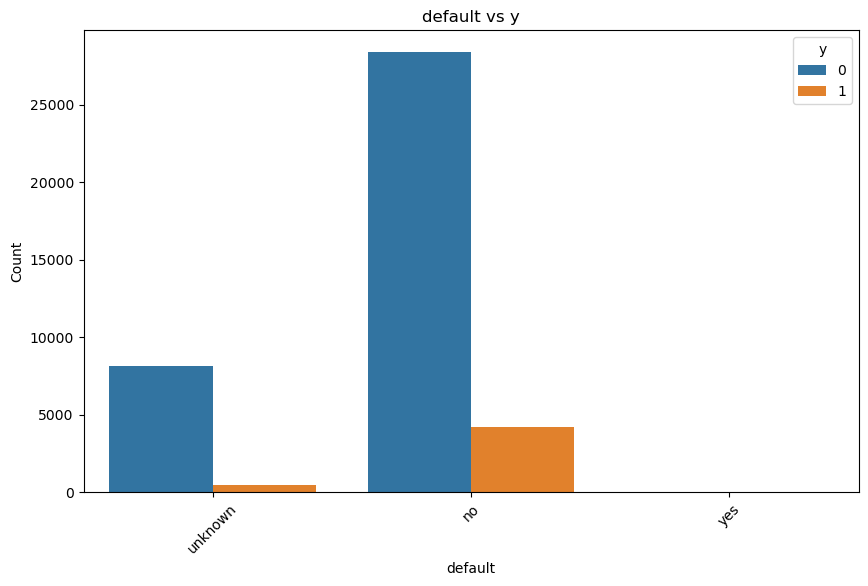

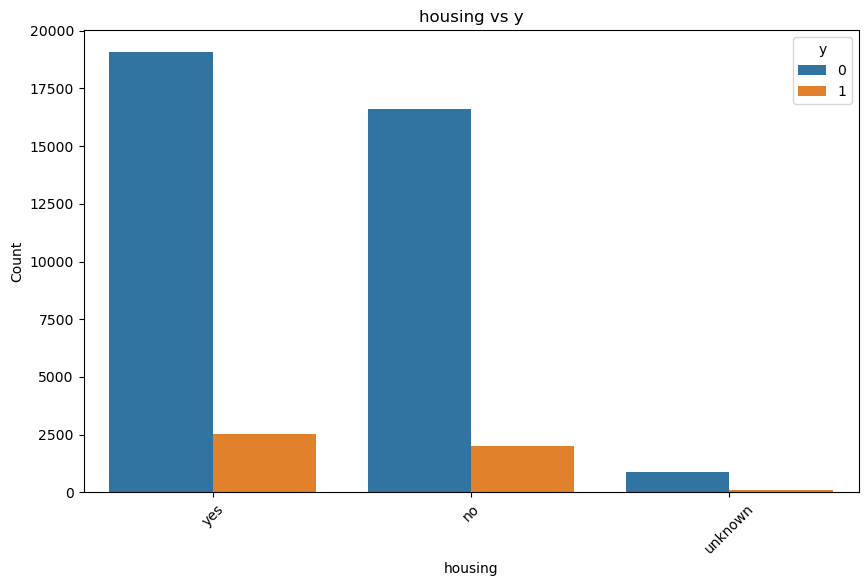

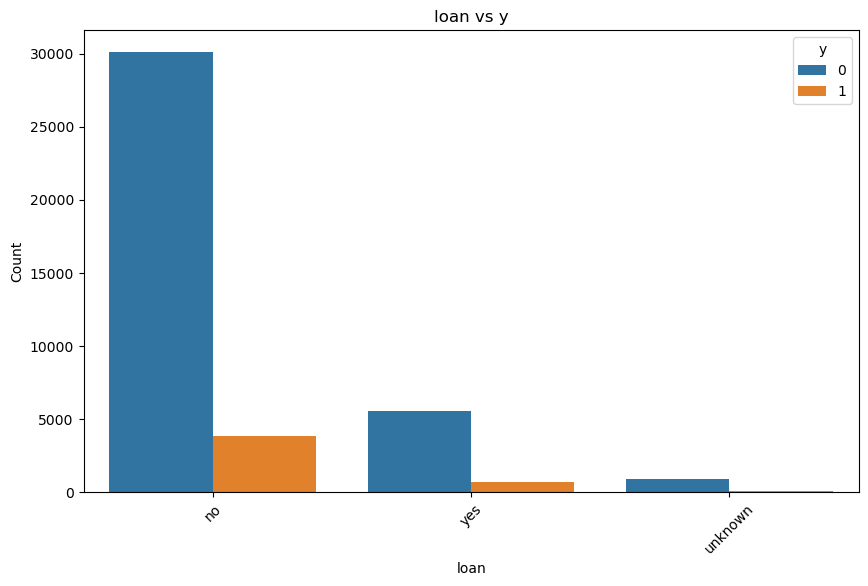

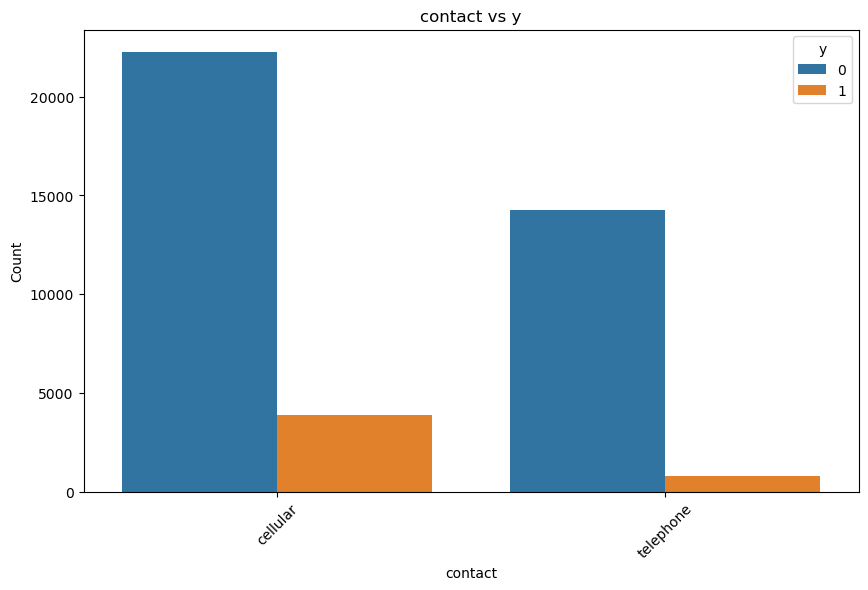

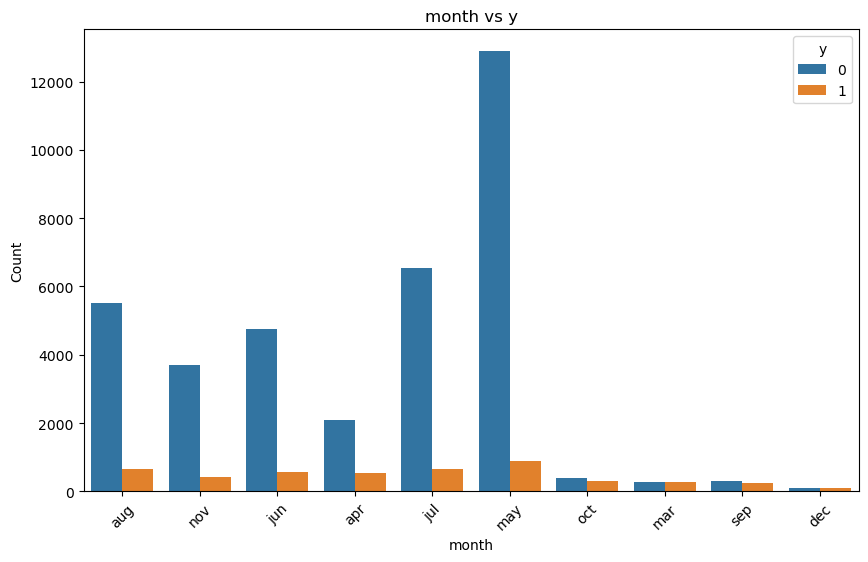

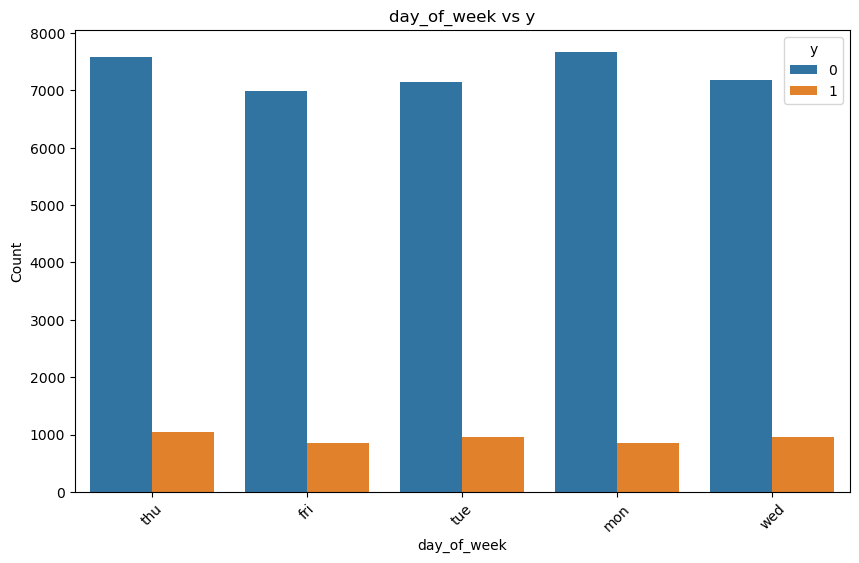

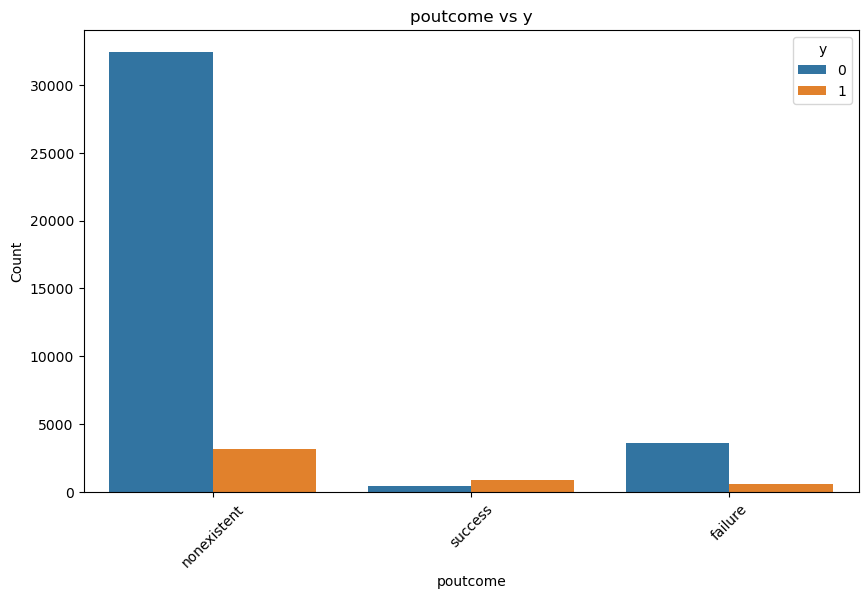

In [97]:
# Visualize the relationship between categorical columns and the target variable 'y'
categorical_columns = campaign.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='y', data=campaign)
    plt.title(f'{column} vs y')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='y', loc='upper right')
    plt.show()

## 1.2

Analyse the features for skewness and transform the highly skewed features. Retrain the modell and evaluate the difference.

In [98]:
# Analyze skewness of numerical features
skewness = campaign[numerical_columns].skew()
print("Skewness of numerical features:")
print(skewness)

# Identify highly skewed features
highly_skewed_features = skewness[abs(skewness) > 1].index
print("Highly skewed features:")
print(highly_skewed_features)

# Apply transformations to highly skewed features
for feature in highly_skewed_features:
    campaign[feature] = np.log1p(campaign[feature])

Skewness of numerical features:
age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp_var_rate     -0.724096
cons_price_idx   -0.230888
cons_conf_idx     0.303180
euribor3m        -0.709188
nr_employed      -1.044262
y                 2.450330
dtype: float64
Highly skewed features:
Index(['duration', 'campaign', 'pdays', 'previous', 'nr_employed', 'y'], dtype='object')


In [99]:
# One-hot encode categorical variables
campaign_encoded = pd.get_dummies(campaign)

# Split the data into train and test sets
X = campaign_encoded.drop(columns=['y'])
y = campaign_encoded['y']

# Convert target variable 'y' into discrete classes

# If 'y' is continuous, you can binarize it into two classes
y = pd.cut(y, bins=2, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy before feature transformation:", accuracy)


Accuracy before feature transformation: 0.9130857004127215


## 1.3

Find the features that have a high amount of zero values. Engineer flag features (boolean) for all variables that have at least 100 observations in both the 'yes' and 'no' columns. Retrain the modell and evaluate the difference.

In [100]:
# Assuming 'y' contains continuous values, let's convert it to discrete classes for classification
# For binary classification, we can use binarization
from sklearn.preprocessing import Binarizer

# Define a threshold to binarize 'y'
threshold = 0.5  # You may adjust this threshold based on your data and requirements

# Binarize 'y'
binarizer = Binarizer(threshold=threshold)
y_flag_binarized = binarizer.fit_transform(y_flag.values.reshape(-1, 1)).flatten()

# Retrain the model with the engineered flag features
X_train_flag, X_test_flag, y_train_flag, y_test_flag = train_test_split(X_flag, y_flag_binarized, test_size=0.2, random_state=42)

model_flag = RandomForestClassifier(random_state=42)
model_flag.fit(X_train_flag, y_train_flag)

# Evaluate the model with flag features on the test set
y_pred_flag = model_flag.predict(X_test_flag)
accuracy_flag = accuracy_score(y_test_flag, y_pred_flag)
print("Accuracy after flag feature engineering:", accuracy_flag)


Accuracy after flag feature engineering: 0.9083515416363195


## 1.4

Encode the categorical features. Retrain the model and evaluate the difference.

In [101]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_encoded)
y_test_encoded = label_encoder.transform(y_test_encoded)

# Now, retrain the model with the properly encoded target variable
model_encoded = RandomForestClassifier(random_state=42)
model_encoded.fit(X_train_encoded, y_train_encoded)

# Evaluate the model with encoded features on the test set
y_pred_encoded = model_encoded.predict(X_test_encoded)
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy after encoding categorical features:", accuracy_encoded)


Accuracy after encoding categorical features: 0.9129643117261471


## 1.5
Implement a Scaled version with all the engineered features. Retrain the model and evaluate the results.

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define numerical and categorical features
numerical_features = X_encoded.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_encoded.select_dtypes(include=['object']).columns

# Create pipeline for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values with most frequent value
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# Append the classifier to the preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Retrain the model with the scaled features
clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy_scaled = clf.score(X_test, y_test)
print("Accuracy after scaling and retraining the model:", accuracy_scaled)


Accuracy after scaling and retraining the model: 0.9095654285020636


## 1.6
Select a good featureset manually. Retrain the model and evaluate the results.

In [111]:
from sklearn.model_selection import train_test_split

# Define the selected features
selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Subset the data with selected features
X_selected = X_encoded[selected_features]

# Split the data into train and test sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Retrain the model with the selected features
clf.fit(X_train_selected, y_train_selected)

# Evaluate the model on the test set with selected features
accuracy_selected = clf.score(X_test_selected, y_test_selected)
print("Accuracy with selected features:", accuracy_selected)


KeyError: "['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'] not in index"

## 1.7
Create engineered features and add them. Experiment with best feature combination. Retrain the model and evaluate the results.

In [112]:
# 1. Create Engineered Features
# For example, let's say we want to create a new feature by combining 'age' and 'campaign'
X_encoded['age_campaign_ratio'] = X_encoded['age'] / X_encoded['campaign']

# 2. Experiment with Feature Combinations
# Define different feature sets to experiment with
feature_sets = [
    ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
     'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
     'euribor3m', 'nr.employed'],  # List of features to include in the first set
    ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
     'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 
     'nr.employed', 'age_campaign_ratio'],  # Include the engineered feature in the second set
]

best_accuracy = 0
best_feature_set = None

# Iterate over different feature sets
for features in feature_sets:
    # Check if all features in the current set are present in X_encoded
    if not all(feature in X_encoded.columns for feature in features):
        print(f"Features {features} are not present in X_encoded.")
        continue
    
    # Split the data into train and test sets using the selected features
    X_selected = X_encoded[features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)

    # Update the best feature set if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature_set = features

# 3. Retrain the Model and Evaluate with the Best Feature Set
if best_feature_set is not None:
    print("Best feature set:", best_feature_set)
    print("Best accuracy:", best_accuracy)
else:
    print("No valid feature set found.")

Features ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] are not present in X_encoded.
Features ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_campaign_ratio'] are not present in X_encoded.
No valid feature set found.


## 1.8

Put it all together. Create the best logistic regression model for this dataset.

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
# Model initialization
logreg = LogisticRegression()

In [115]:
# Fit the data(train the model)
logreg.fit(X_train, y_train)

LogisticRegression()

In [117]:
# Predict
y_predicted = logreg.predict(X_test)

In [118]:
# model evaluation
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [119]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_predicted)
print(conf)

[[7064  231]
 [ 529  414]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))


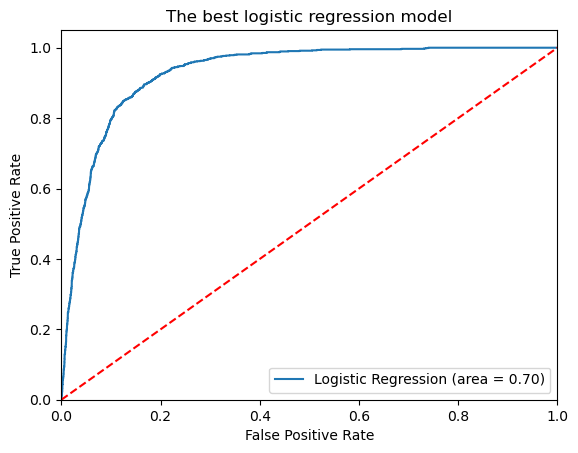

In [120]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The best logistic regression model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 1.9

Try the same with a decision tree classifier.  Retrain the model and evaluate the results.

In [121]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Assuming X and y are already preprocessed

# Initialize Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# 4. Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8888079630978393


## 2.0
Retrieve daily weather data from meteostat https://dev.meteostat.net/python/ for the last 20 years

In [ ]:
pip install meteostat


In [ ]:
from datetime import datetime, timedelta
from meteostat import Point, Daily

# Define the location (latitude and longitude) for which you want to retrieve weather data
location = Point(40.7128, -74.0060)  

# Define the start and end dates for the time period (last 20 years)
start_date = datetime.now() - timedelta(days=365 * 20)  # 20 years ago from today
end_date = datetime.now()

# Fetch weather data

data = Daily(location, start_date, end_date)
data = data.fetch()

# Print the first few rows of the data
print(data.head())


## 2.1
Analyse daily windspeeds similar to what we did in class for precipitations

In [ ]:
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Define the location (latitude and longitude) for which you want to retrieve weather data
location = Point(40.7128, -74.0060) 

# Define the start and end dates for the time period (last 20 years)
start_date = datetime.now() - timedelta(days=365 * 20)  # 20 years ago from today
end_date = datetime.now()

# Fetch weather data
data = Daily(location, start_date, end_date)
data = data.fetch()

# Analyze wind speeds
wind_speeds = data['wspd']  # Assuming 'wspd' is the column for wind speed in the data

# Compute descriptive statistics
mean_wind_speed = wind_speeds.mean()
median_wind_speed = wind_speeds.median()
min_wind_speed = wind_speeds.min()
max_wind_speed = wind_speeds.max()
std_wind_speed = wind_speeds.std()

# Visualize wind speed distribution
plt.hist(wind_speeds, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

# Print descriptive statistics
print(f'Mean Wind Speed: {mean_wind_speed} m/s')
print(f'Median Wind Speed: {median_wind_speed} m/s')
print(f'Minimum Wind Speed: {min_wind_speed} m/s')
print(f'Maximum Wind Speed: {max_wind_speed} m/s')
print(f'Standard Deviation of Wind Speed: {std_wind_speed} m/s')


## 2.2

Create a forecasting model to forecast monthly average windspeed

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming 'data' contains the daily wind speed data
monthly_avg_wind_speed = data.resample('M').mean()

# Selecting the appropriate column for modeling (assuming it's named 'wind_speed')
wind_speed_data = monthly_avg_wind_speed['wspd']

# Split Data
train_data = wind_speed_data.iloc[:-12]  # Use all but the last year for training
test_data = wind_speed_data.iloc[-12:]   # Use the last year for testing

# Model Selection
# Specify appropriate p, d, q parameters
p = 1  # Number of AR terms
d = 1  # Number of Differences
q = 1  # Number of MA terms
model = ARIMA(train_data, order=(p, d, q))

# Model Training
model_fit = model.fit()

# Model Evaluation
predictions = model_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Forecasting
forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months
print(forecast)
